In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore, ttest_ind, mannwhitneyu
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
from sklearn.exceptions import DataConversionWarning,ConvergenceWarning

In [2]:
warnings.filterwarnings(action = 'ignore', category = ConvergenceWarning)
#warnings.filterwarnings(action = 'ignore', category = SettingWithCopyWarning)

In [3]:
dft = pd.read_csv(r'C:\Users\anura\Desktop\Capstone Project\Fraud Detection\Training_Test\UNSW_NB15_training-set.csv')

In [4]:
dft.shape

(175341, 45)

In [5]:
dftt = pd.read_csv(r'C:\Users\anura\Desktop\Capstone Project\Fraud Detection\Training_Test\UNSW_NB15_testing-set.csv')

In [6]:
dftt.shape

(82332, 45)

In [7]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
dft['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [9]:
for i in dft.columns[1:]:
    print(i, dft[i].nunique())

dur 74039
proto 133
service 13
state 9
spkts 480
dpkts 443
sbytes 7214
dbytes 6660
rate 76991
sttl 11
dttl 6
sload 80885
dload 77474
sloss 409
dloss 370
sinpkt 76161
dinpkt 74245
sjit 77532
djit 76831
swin 13
stcpb 75265
dtcpb 75089
dwin 7
tcprtt 43319
synack 40142
ackdat 37708
smean 1357
dmean 1328
trans_depth 11
response_body_len 2386
ct_srv_src 52
ct_state_ttl 5
ct_dst_ltm 50
ct_src_dport_ltm 47
ct_dst_sport_ltm 32
ct_dst_src_ltm 54
is_ftp_login 4
ct_ftp_cmd 4
ct_flw_http_mthd 11
ct_src_ltm 50
ct_srv_dst 52
is_sm_ips_ports 2
attack_cat 10
label 2


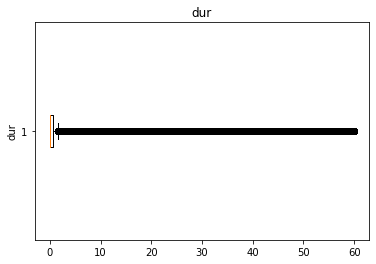

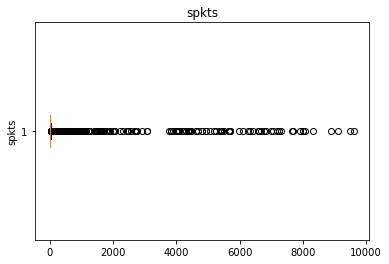

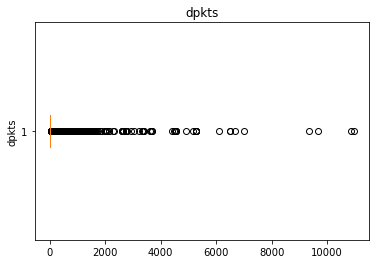

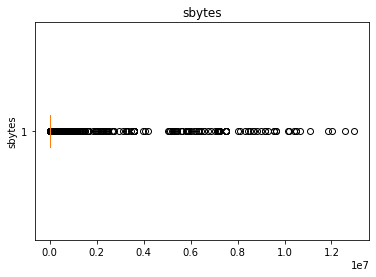

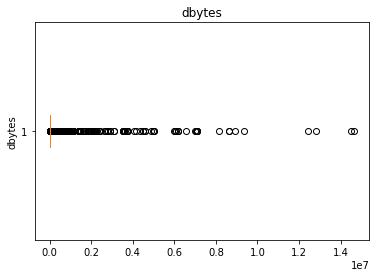

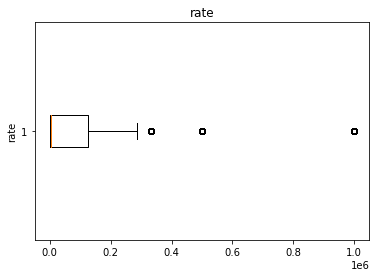

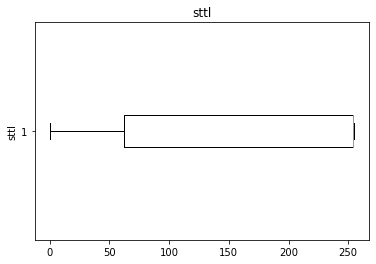

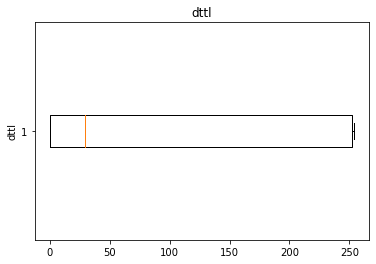

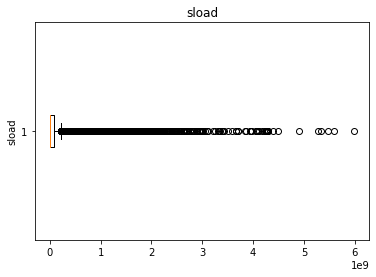

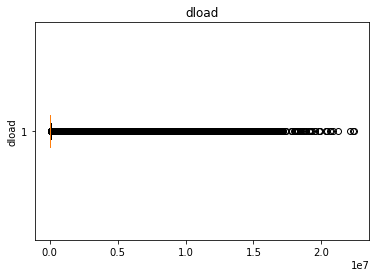

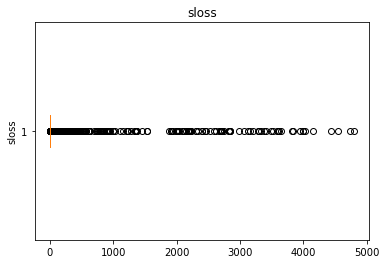

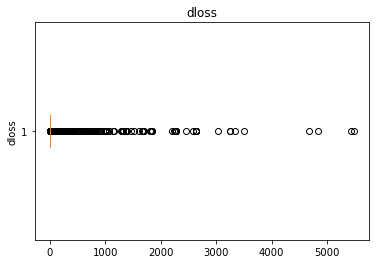

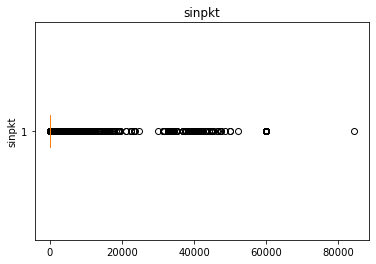

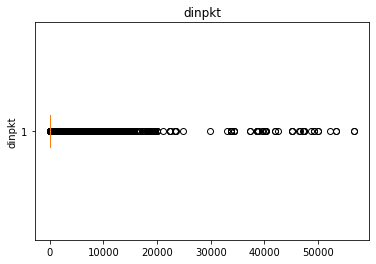

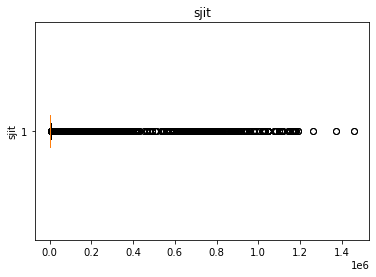

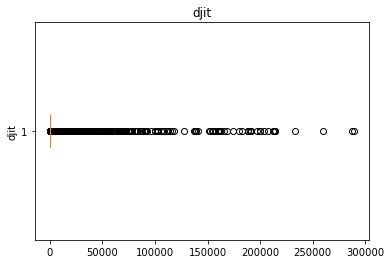

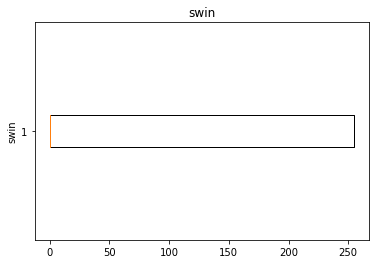

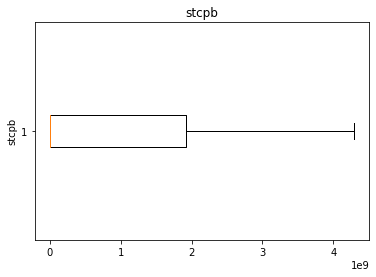

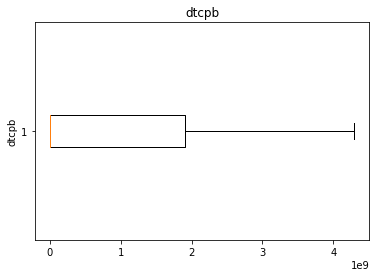

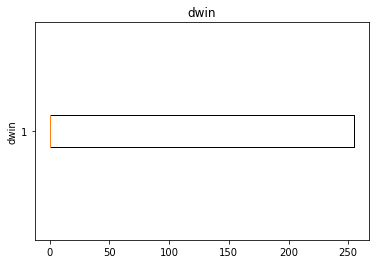

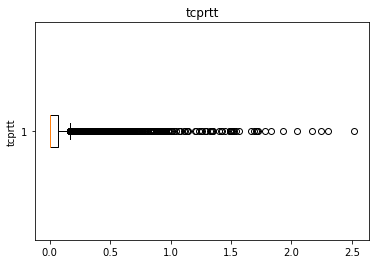

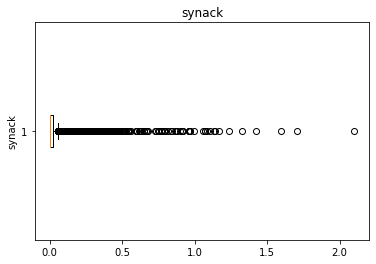

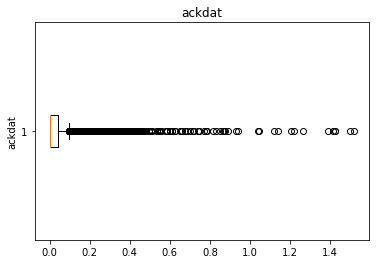

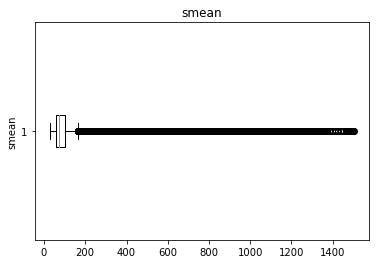

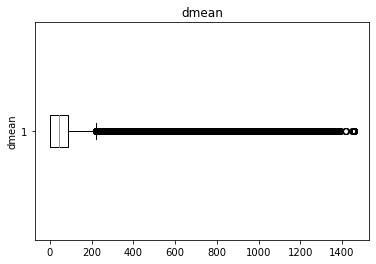

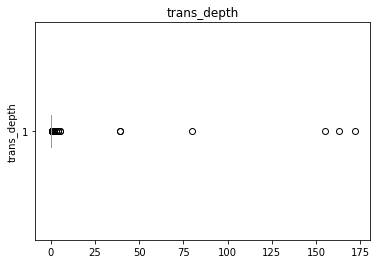

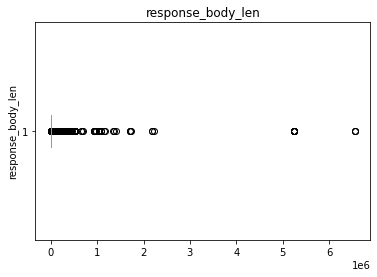

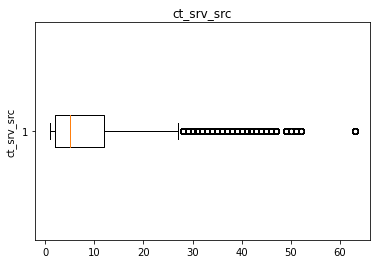

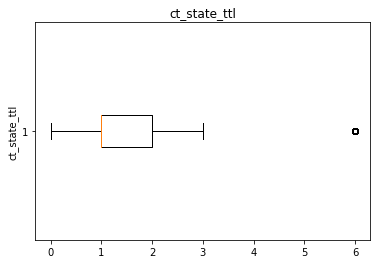

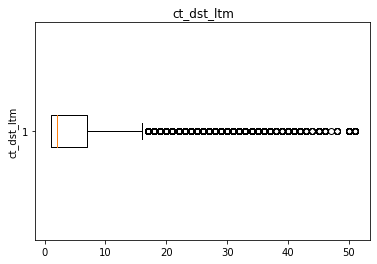

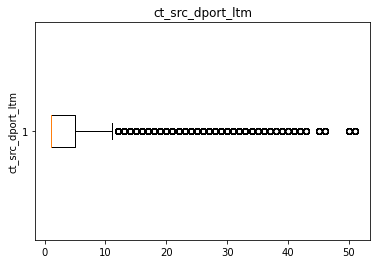

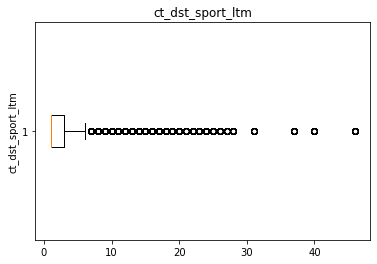

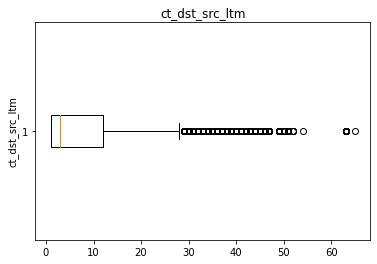

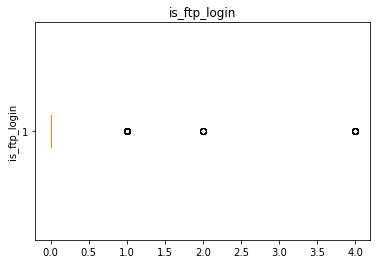

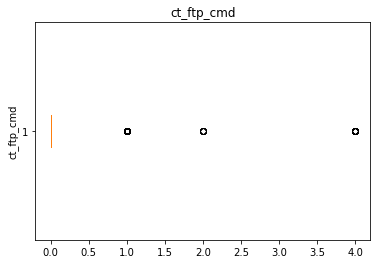

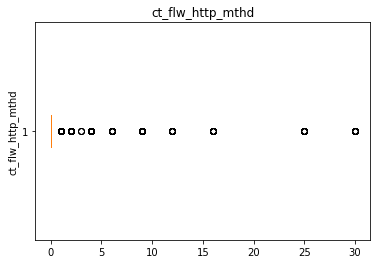

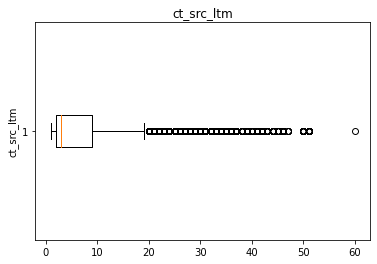

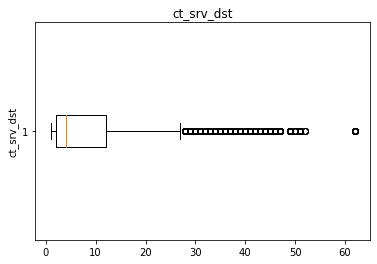

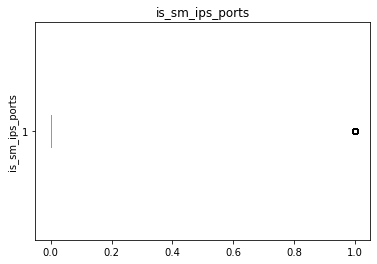

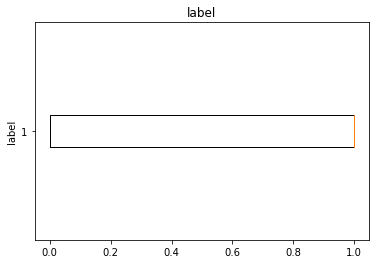

In [10]:
dft_num = dft.select_dtypes(include = np.number)
for i in dft_num.columns[1:]:
    plt.boxplot(dft[i], vert = False)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [11]:
dft.iloc[:,:18].head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602


In [12]:
dft.iloc[:, 18:32].head()

,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src
0,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1
1,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43
2,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7
3,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1
4,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43


In [13]:
dft.iloc[:, 32:].head()

,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [14]:
dft['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [15]:
dft['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [16]:
dft[dft['label'] == 0][ 'dttl'].value_counts()

29     39455
252     9724
0       6746
60        71
31         2
254        2
Name: dttl, dtype: int64

In [17]:
for i in dft.columns[1:]:
    na = dft[dft[i] == '-'].shape[0]
    if(na > 0):
        print(i, na)

C:\Users\anura\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


service 94168


In [18]:
dft['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [19]:
dft_cat = dft.select_dtypes(include = 'object')

In [20]:
lb = LabelEncoder()
for i in dft_cat.columns:
    dft_cat[i] = lb.fit_transform(dft_cat[i])

<ipython-input-20-42483480564c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_cat[i] = lb.fit_transform(dft_cat[i])


In [21]:
dft_cat

,proto,service,state,attack_cat
0,113,0,2,6
1,113,0,2,6
2,113,0,2,6
3,113,3,2,6
4,113,0,2,6
...,...,...,...,...
175336,119,2,3,5
175337,113,0,2,8
175338,119,2,3,5
175339,119,2,3,5


In [22]:
df_final = pd.concat([dft_num, dft_cat], axis = 1)
df_final.shape

(175341, 45)

In [23]:
df_final.drop('id', axis = 1, inplace = True)

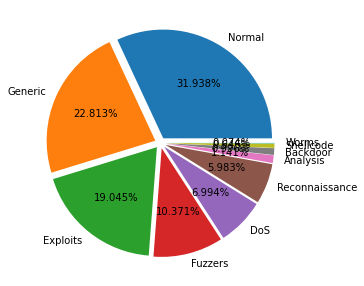

In [33]:
plt.figure(figsize = (10,5))
plt.pie(dft['attack_cat'].value_counts(), labels = dft['attack_cat'].value_counts().index,
        explode = [0.05]*10, autopct = '%0.3f%%')
#plt.legend(loc = 'upper right')
plt.show()

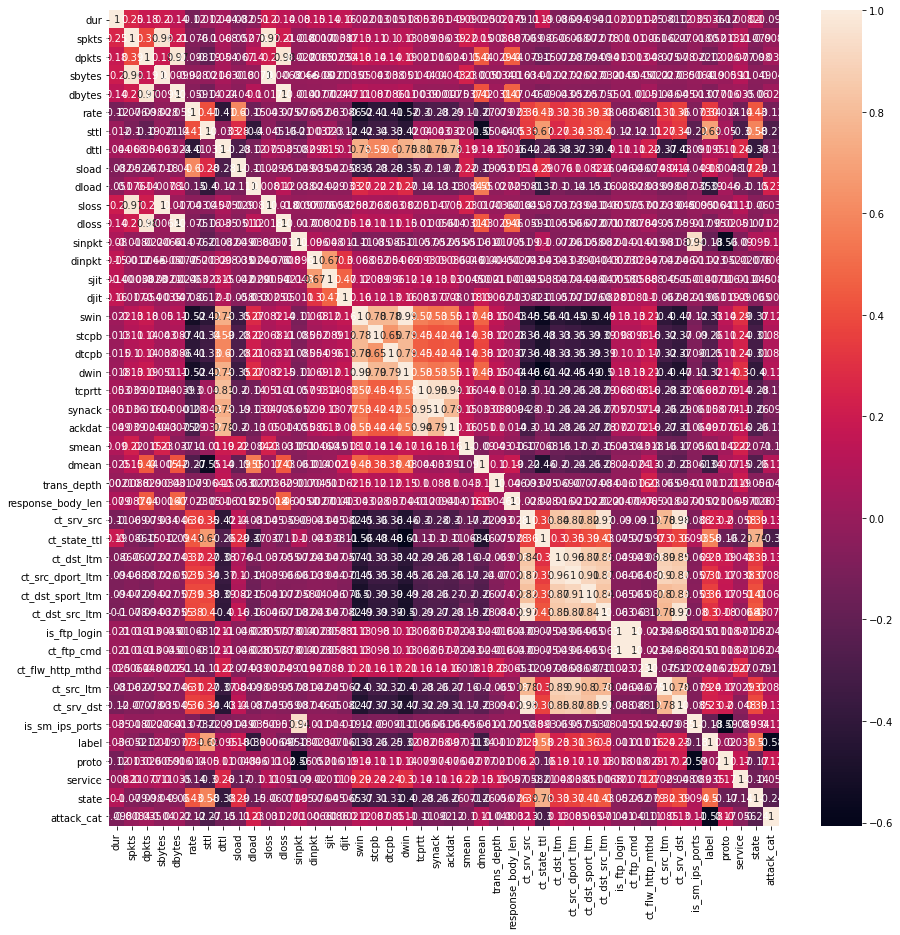

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

In [25]:
x_inp = df_final.drop(['label', 'attack_cat'], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_inp.values, i) for i in range(x_inp.shape[1])]
vif['features'] = x_inp.columns
vif.sort_values(by = 'VIF', ascending = False).head(10)

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
21,inf,synack
34,inf,ct_ftp_cmd
33,inf,is_ftp_login
22,inf,ackdat
20,inf,tcprtt
11,738.214398,dloss
2,383.252954,dpkts
10,341.694223,sloss
3,275.547598,sbytes
4,269.668697,dbytes


In [26]:
df_corr = df_final.corr()
for i in df_corr.columns:
    print(i)
    print(df_corr[abs(df_corr[i]) > 0.3][i])
    print()

dur
dur    1.0
Name: dur, dtype: float64

spkts
spkts     1.000000
dpkts     0.390067
sbytes    0.963791
sloss     0.971069
Name: spkts, dtype: float64

dpkts
spkts                0.390067
dpkts                1.000000
dbytes               0.971907
dloss                0.978636
dmean                0.441445
response_body_len    0.442194
Name: dpkts, dtype: float64

sbytes
spkts     0.963791
sbytes    1.000000
sloss     0.996109
Name: sbytes, dtype: float64

dbytes
dpkts                0.971907
dbytes               1.000000
dloss                0.996504
dmean                0.419965
response_body_len    0.470905
Name: dbytes, dtype: float64

rate
rate                1.000000
sttl                0.407572
dttl               -0.414546
sload               0.602492
swin               -0.515681
stcpb              -0.408750
dtcpb              -0.409046
dwin               -0.518117
tcprtt             -0.300794
ct_srv_src          0.357704
ct_state_ttl        0.431534
ct_dst_ltm          0.31722

In [27]:
df0 = df_final[df_final['label'] == 0] # normal
df1 = df_final[df_final['label'] == 1] # attack

In [28]:
sig = []
insig = []
for i in df_final.drop(['label', 'attack_cat'], axis = 1).columns:
    tstat, pval = ttest_ind(df0[i], df1[i])
    if(pval > 0.05):
        insig.append((i, pval))
    else:
        sig.append((i, pval))
print('Insignificant', insig)

Insignificant [('sloss', 0.7886706691433)]


In [29]:
mannwhitneyu(df0['sloss'], df1['sloss'])
    # to be asked from mentor

MannwhitneyuResult(statistic=1904842080.5, pvalue=0.0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

In [31]:
X = df_final.drop(['label', 'attack_cat'], axis = 1)
Y = df_final['attack_cat']

In [74]:
Y.value_counts()

6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64

In [32]:
X_std = X.apply(zscore)

In [33]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [34]:
# unscaled data
LR = LogisticRegression(random_state = 0)
score = cross_val_score(LR, X, Y, cv = kf, scoring = 'f1_weighted')
be_u = np.mean(1-score)
ve_u = np.std(score, ddof = 1)
print('bias error:', be_u)
print('variance error:', ve_u)

bias error: 0.6376538463730897
variance error: 0.004253503178781753


In [35]:
# fitting model with unscaled data
LR1 = LogisticRegression()
LR1.fit(X, Y)
ypred = LR1.predict(X)

In [36]:
acc = accuracy_score(Y, ypred)
prec = precision_score(Y, ypred, average = 'micro')
rec = recall_score(Y, ypred, average = 'micro')
f1 = f1_score(Y, ypred, average = 'micro')

In [37]:
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('f1 score:', f1)

Accuracy: 0.5021187286487473
Precision: 0.5021187286487473
Recall: 0.5021187286487473
f1 score: 0.5021187286487473


In [38]:
# scaled data
LR = LogisticRegression(random_state = 0)
score = cross_val_score(LR, X_std, Y, cv = kf, scoring = 'f1_weighted')
be_s = np.mean(1-score)
ve_s = np.std(score, ddof = 1)
print('bias error:', be_s)
print('variance error:', ve_s)

bias error: 0.26003575322707434
variance error: 0.0019636357238370064


In [39]:
# fitting model with scaled data
LR2 = LogisticRegression()
LR2.fit(X_std, Y)
ypred = LR2.predict(X_std)

In [40]:
acc = accuracy_score(Y, ypred)
prec = precision_score(Y, ypred, average = 'micro')
rec = recall_score(Y, ypred, average = 'micro')
f1 = f1_score(Y, ypred, average = 'micro')

In [41]:
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('f1 score:', f1)

Accuracy: 0.7591093925550784
Precision: 0.7591093925550784
Recall: 0.7591093925550784
f1 score: 0.7591093925550783


In [42]:
dftt_num = dftt.select_dtypes(include = np.number)
dftt_cat = dftt.select_dtypes(include = 'object')

In [43]:
lb = LabelEncoder()
for i in dftt_cat.columns:
    dftt_cat[i] = lb.fit_transform(dftt_cat[i])

<ipython-input-43-3ff70ba947c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftt_cat[i] = lb.fit_transform(dftt_cat[i])


In [44]:
dftt_fin = pd.concat([dftt_num, dftt_cat], axis = 1)

In [45]:
dftt_fin.drop('id', axis = 1, inplace = True)

In [46]:
Xtest = dftt_fin.drop(['label', 'attack_cat'], axis = 1)
Ytest = dftt_fin['attack_cat']

In [47]:
Xt_std = Xtest.apply(zscore)

In [75]:
# both train and test without scaling
ypred = LR1.predict(Xtest)

In [76]:
acc_uu = accuracy_score(Ytest, ypred)
prec_uu = precision_score(Ytest, ypred, average = 'macro')
rec_uu = recall_score(Ytest, ypred, average = 'macro')
f1_uu = f1_score(Ytest, ypred, average = 'macro')

C:\Users\anura\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print('Accuracy:', acc_uu)
print('Precision:', prec_uu)
print('Recall:', rec_uu)
print('f1 score:', f1_uu)

Accuracy: 0.5914589709954817
Precision: 0.13183030600110532
Recall: 0.17936836494990524
f1 score: 0.140267862029002


In [68]:
# unscaled data on training and scaled data on test
ypred = LR1.predict(Xt_std)

In [69]:
acc_us = accuracy_score(Ytest, ypred)
prec_us = precision_score(Ytest, ypred, average = 'weighted')
rec_us = recall_score(Ytest, ypred, average = 'weighted')
f1_us = f1_score(Ytest, ypred, average = 'weighted')

C:\Users\anura\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print('Accuracy:', acc_us)
print('Precision:', prec_us)
print('Recall:', rec_us)
print('f1 score:', f1_us)

Accuracy: 0.13800223485400573
Precision: 0.536110236918179
Recall: 0.13800223485400573
f1 score: 0.17150283487661025


In [71]:
# scaled data on training and unscaled data on test
ypred = LR2.predict(Xtest)

In [72]:
acc_su = accuracy_score(Ytest, ypred)
prec_su = precision_score(Ytest, ypred, average = 'micro')
rec_su = recall_score(Ytest, ypred, average = 'micro')
f1_su = f1_score(Ytest, ypred, average = 'micro')

C:\Users\anura\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
print('Accuracy:', acc_su)
print('Precision:', prec_su)
print('Recall:', rec_su)
print('f1 score:', f1_su)

Accuracy: 0.11596948938444347
Precision: 0.4274543229699145
Recall: 0.11596948938444347
f1 score: 0.14416578713821412


In [57]:
# scaled data on training and scaled data on test
ypred = LR2.predict(Xt_std)

In [58]:
acc_ss = accuracy_score(Ytest, ypred)
prec_ss = precision_score(Ytest, ypred, average = 'micro')
rec_ss = recall_score(Ytest, ypred, average = 'micro')
f1_ss = f1_score(Ytest, ypred, average = 'micro')

In [59]:
print('Accuracy:', acc_ss)
print('Precision:', prec_ss)
print('Recall:', rec_ss)
print('f1 score:', f1_ss)

Accuracy: 0.7243842005538551
Precision: 0.7243842005538551
Recall: 0.7243842005538551
f1 score: 0.7243842005538551


In [60]:
scorecard = pd.DataFrame()
scorecard['train_test_unscaled'] = [acc_uu, prec_uu, rec_uu, f1_uu]
scorecard['train_unscaled_test_scaled'] = [acc_us, prec_us, rec_us, f1_us]
scorecard['train_scaled_test_unscaled'] = [acc_su, prec_su, rec_su, f1_su]
scorecard['train_test_scaled'] = [acc_ss, prec_ss, rec_ss, f1_ss]
scorecard.index = ['accuracy', 'precision', 'recall', 'f1 score']
scorecard

,train_test_unscaled,train_unscaled_test_scaled,train_scaled_test_unscaled,train_test_scaled
accuracy,0.591459,0.138002,0.115969,0.724384
precision,0.591459,0.138002,0.115969,0.724384
recall,0.591459,0.138002,0.115969,0.724384
f1 score,0.591459,0.138002,0.115969,0.724384


In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier

In [62]:
# no need of boosting

In [63]:
# n_estimators = 29